<a href="https://colab.research.google.com/github/Mladee/Machine-Learning/blob/main/Mladenovici_Andrei_433A_Demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***Incarcarea datelor***


In [2]:
from matplotlib import pyplot
from keras.datasets import cifar10

(trainX, trainy), (testX, testy) = cifar10.load_data()


print('Train: X=%s, y=%s' % (trainX.shape, trainy.shape))
print('Test: X=%s, y=%s' % (testX.shape, testy.shape))

Train: X=(50000, 32, 32, 3), y=(50000, 1)
Test: X=(10000, 32, 32, 3), y=(10000, 1)


***Impartirea datelor in train si test***

In [3]:
import numpy as np
from keras.utils import np_utils
import tensorflow
import keras


x_train=trainX
y_train=trainy
x_test=testX
y_test=testy


num_classes = len(np.unique(y_train))
y_train = tensorflow.keras.utils.to_categorical(y_train, num_classes)
y_test = tensorflow.keras.utils.to_categorical(y_test, num_classes)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

(x_train, x_valid) = x_train[5000:], x_train[:5000]
(y_train, y_valid) = y_train[5000:], y_train[:5000]

print('x_train shape:', x_train.shape)

print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')
print(x_valid.shape[0], 'validation samples')

x_train shape: (45000, 32, 32, 3)
45000 train samples
10000 test samples
5000 validation samples


***Crearea modelului***

In [4]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten

# Reteaua neurala

model = Sequential()
model.add(Flatten(input_shape = x_train.shape[1:]))
model.add(Dense(100, activation='relu'))   #numarul de neuroni hidden
model.add(Dense(num_classes, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 3072)              0         
                                                                 
 dense (Dense)               (None, 100)               307300    
                                                                 
 dense_1 (Dense)             (None, 10)                1010      
                                                                 
Total params: 308,310
Trainable params: 308,310
Non-trainable params: 0
_________________________________________________________________


***Variem batch_size pentru a testa performanta optima.***

In [5]:
model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])

for i in range(100,1000,200):
  print('Pentru batch size = {}:'.format(i))
  hist = model.fit(x_train, y_train, batch_size=i, epochs=5,validation_data=(x_test, y_test),verbose=1, shuffle=False)
  print('\n'*5)

Pentru batch size = 100:
Epoch 1/5
450/450 [==============================] - 6s 11ms/step - loss: 1.9584 - accuracy: 0.3031 - val_loss: 1.8464 - val_accuracy: 0.3465
Epoch 2/5
450/450 [==============================] - 4s 10ms/step - loss: 1.8037 - accuracy: 0.3636 - val_loss: 1.7693 - val_accuracy: 0.3773
Epoch 3/5
450/450 [==============================] - 5s 11ms/step - loss: 1.7498 - accuracy: 0.3795 - val_loss: 1.7378 - val_accuracy: 0.3867
Epoch 4/5
450/450 [==============================] - 4s 10ms/step - loss: 1.7145 - accuracy: 0.3940 - val_loss: 1.7200 - val_accuracy: 0.3914
Epoch 5/5
450/450 [==============================] - 4s 10ms/step - loss: 1.6897 - accuracy: 0.4031 - val_loss: 1.7030 - val_accuracy: 0.4009






Pentru batch size = 300:
Epoch 1/5
150/150 [==============================] - 4s 22ms/step - loss: 1.6465 - accuracy: 0.4242 - val_loss: 1.6680 - val_accuracy: 0.4166
Epoch 2/5
150/150 [==============================] - 3s 20ms/step - loss: 1.6367 - accuracy:

***Evaluare scor final***

In [6]:
scor_final = model.evaluate(x_valid, y_valid, verbose=0)
scor_final

[1.614946722984314, 0.4300000071525574]

***Optimizare model***

In [7]:
def define_model(nr_hidden):
  model = Sequential()
  model.add(Flatten(input_shape = x_train.shape[1:]))
  model.add(Dense(nr_hidden, activation='relu'))   #numarul de neuroni hidden
  model.add(Dense(num_classes, activation='softmax'))
  model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])
  model.summary()
  return model

def run_test(nr_hidden):
  model=define_model(nr_hidden)

In [8]:
nr_hidden=np.linspace(10, 300, 20)
nr_hidden=nr_hidden.astype(int)
acc=np.zeros(len(nr_hidden))

for i in range (len(nr_hidden)):
  define_model(nr_hidden[i])
  hist = model.fit(x_train, y_train, batch_size=300, epochs=5,validation_data=(x_test, y_test),verbose=1, shuffle=False)
  l, a = model.evaluate(x_valid, y_valid, verbose=0)
  acc[i]=a

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 3072)              0         
                                                                 
 dense_2 (Dense)             (None, 10)                30730     
                                                                 
 dense_3 (Dense)             (None, 10)                110       
                                                                 
Total params: 30,840
Trainable params: 30,840
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
150/150 [==============================] - 3s 22ms/step - loss: 1.5817 - accuracy: 0.4426 - val_loss: 1.6351 - val_accuracy: 0.4201
Epoch 2/5
150/150 [==============================] - 3s 20ms/step - loss: 1.5785 - accuracy: 0.4464 - val_loss: 1.6297 - val_accuracy: 0.4228
Epoch 3/5
150/150 [===========

# New Section

***Plottare acuratete si eroare***

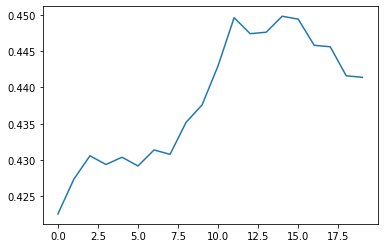

In [10]:
import matplotlib.pyplot as plt
plt.plot(acc)

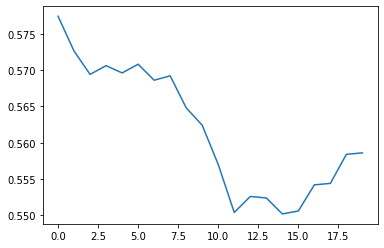

In [11]:
plt.plot(1-acc)

***Gasire minim cu ajutorul metodei sectiunii de aur***

In [12]:
x = np.linspace(0,17,18)
y = 1-acc
tol=1
a=0
b=17

c=b-0.618*(b-a)
d=a+0.618*(b-a)

while abs((b-a))>tol:
  c=b-0.618*(b-a)
  d=a+0.618*(b-a)
  if y[round(c)]<y[round(d)]:
    a=a
    b=round(d)
  else:
    a=round(c)
    b=b

print(a)
print(b)


16
17


In [15]:
acc[16]

0.4458000063896179

***Asadar,modelul ofera acuratete de 44.58%***